In [267]:
import numpy as np
import pandas as pd

raw_data_comp=pd.read_csv("C:\\Users\\kinch\\Downloads\\companies.csv",delimiter=',',encoding= 'ISO-8859-1')
raw_data_round2=pd.read_csv("C:\\Users\\kinch\\Downloads\\rounds2.csv",delimiter=',',encoding= 'ISO-8859-1')
raw_data_mapping=pd.read_csv("C:\\Users\\kinch\\Downloads\\mapping.csv",delimiter=',',encoding= 'ISO-8859-1')





df1=pd.DataFrame(raw_data_comp)
df2=pd.DataFrame(raw_data_round2)
df3=pd.DataFrame(raw_data_mapping)

df1['permalink'] = df1['permalink'].str.lower()
df2['permalink'] = df2['company_permalink'].str.lower()
df2=df2.drop(['company_permalink'],axis=1)
#print(len(df2.permalink.unique()))



#df.info()

len(df1)
#66368
len(df2)
#114949
len(df3)
#688
df2.head()
df=pd.merge(df1,df2,how='inner',on='permalink')
len(df)
#114942

#df.head()
#df['category_list']=df['category_list'].fillna("No")

#df.head()

#df_updated = df.replace(to_replace ='%Automotive & Sports%', value = 'Automotive & Sports', regex = True) 

#df_updated

#master_frame['category_list']= master_frame['category_list'].str.replace("%Automotive & Sports%","Automotive & Sports",regex=True, case = False) 



#master_frame.loc[master_frame['category_list'].str.contains('Automotive & Sports'), 'category_list'] = 'Automotive & Sports'

#master_frame.groupby(['category_list']).max()

#english=['USA','IND','GBR']
#master_frame.loc[:,'country_code'].isin(english)
#result= master_frame.query("country_code in @english")
#result['funding_round_type']
#print(result.groupby(['funding_round_type']).groups)
#r1.get_group('seed').raised_amount_usd.mean()

#r1.head()
#r1.get_group('seed').raised_amount_usd.mean()

#print(master_frame['country_code'])
#master_frame.shape[0]
#df.name.str.lower()
#raw_data_comp.head()
#df.shape[0]
#df.name.unique()
#df.name.nunique(dropna = True) 

#temp=master_frame.groupby(['funding_round_type'])
#temp.first()
#temp.get_group('private_equity').raised_amount_usd.mean()

#temp=master_frame.groupby(['country_code'])
#temp.head()
#temp.get_group('CHN').raised_amount_usd.mean()


114942

In [268]:
df.isnull().any()
df.isnull().sum()
round(100*(df.isnull().sum()/len(df.index)), 2)



permalink                   0.00
name                        0.00
homepage_url                5.33
category_list               2.96
status                      0.00
country_code                7.54
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
dtype: float64

In [269]:
df = df.drop('funding_round_code', axis=1)
df = df.drop('founded_at', axis=1)



In [270]:
round(100*(df.isnull().sum()/len(df.index)), 2)


permalink                   0.00
name                        0.00
homepage_url                5.33
category_list               2.96
status                      0.00
country_code                7.54
state_code                  9.52
region                      8.84
city                        8.84
funding_round_permalink     0.00
funding_round_type          0.00
funded_at                   0.00
raised_amount_usd          17.39
dtype: float64

In [271]:
df = df[~np.isnan(df['raised_amount_usd'])]


In [272]:
round(100*(df.isnull().sum()/len(df.index)), 2)


permalink                  0.00
name                       0.00
homepage_url               4.56
category_list              1.10
status                     0.00
country_code               6.16
state_code                 8.01
region                     7.42
city                       7.42
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
dtype: float64

In [273]:
df = df.drop('homepage_url', axis=1)
df = df.drop('state_code', axis=1)
df = df.drop('region', axis=1)
df = df.drop('city', axis=1)

In [274]:
round(100*(df.isnull().sum()/len(df.index)), 2)


permalink                  0.00
name                       0.00
category_list              1.10
status                     0.00
country_code               6.16
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
dtype: float64

In [275]:
df.loc[pd.isnull(df['country_code']), ['country_code']] = 'Country'
df.loc[pd.isnull(df['category_list']), ['category_list']] = "Category"
round(100*(df.isnull().sum()/len(df.index)), 2)
len(df2)

114949

In [276]:
df_4=df[df['funding_round_type'].isin(['angel','seed','venture','private_equity'])]

In [277]:
df['country_code'].describe()
len(df)
print(len(df.permalink.unique()))


53914


In [278]:
# function to strip additional values and retian only the first value
def sp(value):
    values = value.split('|')
    if len(values) > 1:
        return values[0]
    else:
        return value

In [279]:
sp('Apps|Games|Mobile')

'Apps'

In [280]:
df['primary_sector'] = df['category_list'].apply(sp)


In [281]:
df=df.drop('category_list',axis=1)
df['primary_sector'] = df['primary_sector'].str.lower(); 
df['primary_sector']


0                         media
2         application platforms
3                          apps
4                   curated web
6                         games
7                 biotechnology
8                 biotechnology
9                     analytics
10                    analytics
11                    analytics
12                    analytics
13                       mobile
15                       mobile
16                   e-commerce
20          health and wellness
21           internet marketing
22                         apps
23                entertainment
24                   e-commerce
25                   e-commerce
26                   e-commerce
27                   e-commerce
28                    education
29                    education
30                       search
31                          art
32                       mobile
34                  curated web
35                  curated web
36                  curated web
                  ...          
114910  

In [282]:
top9 = df[df['country_code'].isin(['USA', 'CHN', 'GBR', 'IND', 'CAN', 'FRA', 'ISR', 'DEU', 'JPN' ])&
          df['funding_round_type'].isin(['private_equity','angel','venture','seed'])]

top9.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False)
top9.groupby('country_code')['raised_amount_usd'].count().sort_values(ascending=False)

top3_english = top9[top9['country_code'].isin(['USA', 'GBR', 'IND'])]
top3_english.head()
len(top3_english)
#57517
#top3_english.primary_sector.unique()

57517

In [283]:
df3 = pd.melt(df3,id_vars=['category_list'],value_vars =['Automotive & Sports','Cleantech / Semiconductors','Entertainment','Health','Manufacturing','News, Search and Messaging','Others','Social, Finance, Analytics, Advertising'])
df3.head()

,category_list,variable,value
0,NaN,Automotive & Sports,0
1,3D,Automotive & Sports,0
2,3D Printing,Automotive & Sports,0
3,3D Technology,Automotive & Sports,0
4,Accounting,Automotive & Sports,0


In [284]:
df3 = df3[df3.value != 0]
#len(df3)

df3.head(10)

,category_list,variable,value
8,Adventure Travel,Automotive & Sports,1
14,Aerospace,Automotive & Sports,1
45,Auto,Automotive & Sports,1
46,Automated Kiosk,Automotive & Sports,1
47,Automotive,Automotive & Sports,1
57,Bicycles,Automotive & Sports,1
69,Boating Industry,Automotive & Sports,1
87,CAD,Automotive & Sports,1
93,Cars,Automotive & Sports,1
188,Design,Automotive & Sports,1


In [285]:
df3 = df3.drop('value', axis=1)


In [286]:
df3.rename(columns={'variable':'main_sector','category_list':'primary_sector'}, inplace=True)
df3.head()
import re
df3['primary_sector'] = df3.primary_sector.apply(lambda x: re.sub('[0]', 'na', str(x)))
df3['primary_sector']=df3['primary_sector'].str.lower()
df3['main_sector']=df3['main_sector'].str.lower()

#df3.primary_sector.sort_values(ascending=True)
print(df3[df3['primary_sector']=='media'])



     primary_sector    main_sector
1810          media  entertainment


In [287]:
top3_english = top9[top9['country_code'].isin(['USA','GBR', 'IND'])&
          df['funding_round_type'].isin(['venture'])]

#top3_english[top3_english['primary_sector']=='media']
top3_english.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False)
top3_english.groupby('country_code')['raised_amount_usd'].count().sort_values(ascending=False)

#top3_english['funding_round_type'].unique()

C:\Users\kinch\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


country_code
USA    36139
GBR     2055
IND      824
Name: raised_amount_usd, dtype: int64

In [288]:
#top3_english['permalink']
#len(top3_english)
top3_english.rename(columns={'category_list':'primary_sector'},inplace=True)

C:\Users\kinch\Anaconda3\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [289]:
top3_english.columns = top3_english.columns.str.strip()
df3.columns = df3.columns.str.strip()

top3_english = pd.merge(top3_english, df3, how='left', on='primary_sector', indicator=True)
top3_english.head()
#top3_english.primary_sector.unique()
#len(top3_english)
#top3_english['primary_sector'].unique()

,permalink,name,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,main_sector,_merge
0,/organization/-fame,#fame,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,media,entertainment,both
1,/organization/0xdata,H2O.ai,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,analytics,"social, finance, analytics, advertising",both
2,/organization/0xdata,H2O.ai,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,analytics,"social, finance, analytics, advertising",both
3,/organization/0xdata,H2O.ai,operating,USA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,analytics,"social, finance, analytics, advertising",both
4,/organization/1-mainstream,1 Mainstream,acquired,USA,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0,apps,"news, search and messaging",both


In [290]:
#both = top3_english[top3_english['_merge'] == 'both']
#len(both)
#left_only.primary_sector.sort_values(ascending=True).unique()



In [291]:
top3_english = top3_english.drop(top3_english[(top3_english.raised_amount_usd < 5000000)].index)
top3_english = top3_english.drop(top3_english[(top3_english.raised_amount_usd > 15000000)].index)
D1 = top3_english[top3_english['country_code'] == 'USA']
D2 = top3_english[top3_english['country_code'] == 'GBR']
D3 = top3_english[top3_english['country_code'] == 'IND']
D1.columns = D1.columns.str.replace(' ', '')
D2.columns = D2.columns.str.replace(' ', '')
D3.columns = D3.columns.str.replace(' ', '')

D3.head()


,permalink,name,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,main_sector,_merge
0,/organization/-fame,#fame,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,media,entertainment,both
55,/organization/21diamonds-india,21Diamonds,operating,IND,/funding-round/6de7ffef8091ba9f33821f4b861f434a,venture,15-11-2012,6369507.0,e-commerce,others,both
278,/organization/a-little-world,A LITTLE WORLD,operating,IND,/funding-round/18d98f82ed392b1609975b81f3e8b3fb,venture,09-09-2008,6410000.0,finance,"social, finance, analytics, advertising",both
933,/organization/adlabs-imagica,Adlabs Imagica,operating,IND,/funding-round/508d3c83daaae9fda3ba6f9682c78f6c,venture,28-10-2014,8180000.0,entertainment,entertainment,both
1269,/organization/agile,Agile,operating,IND,/funding-round/cd3dd1c98ce9d0f632d8752163941674,venture,01-05-2011,5740000.0,finance,"social, finance, analytics, advertising",both


In [292]:
D1.pivot_table(values = 'raised_amount_usd',index = ['main_sector'], aggfunc = {'sum','count'})
#D1.head()
#D1['name']=D1.name.str.lower()
#D1['name']



,count,sum
main_sector,,
automotive & sports,167,1.454104e+09
cleantech / semiconductors,2350,2.163343e+10
entertainment,591,5.099198e+09
health,909,8.211859e+09
manufacturing,799,7.258553e+09
"news, search and messaging",1583,1.397157e+10
others,2950,2.632101e+10
"social, finance, analytics, advertising",2714,2.380738e+10


In [293]:
D2.pivot_table(values = 'raised_amount_usd',index = ['main_sector'], aggfunc = {'sum','count'})


,count,sum
main_sector,,
automotive & sports,16,1.670516e+08
cleantech / semiconductors,130,1.163990e+09
entertainment,56,4.827847e+08
health,24,2.145375e+08
manufacturing,42,3.619403e+08
"news, search and messaging",73,6.157462e+08
others,147,1.283624e+09
"social, finance, analytics, advertising",133,1.089404e+09


In [294]:
D3.pivot_table(values = 'raised_amount_usd',index = ['main_sector'], aggfunc = {'sum','count'})


,count,sum
main_sector,,
automotive & sports,13,1.369000e+08
cleantech / semiconductors,20,1.653800e+08
entertainment,33,2.808300e+08
health,19,1.677400e+08
manufacturing,21,2.009000e+08
"news, search and messaging",52,4.338345e+08
others,110,1.013410e+09
"social, finance, analytics, advertising",60,5.505496e+08


In [295]:
D1[D1['main_sector'] == "others" ].groupby('name')['raised_amount_usd'].sum().sort_values(ascending=False).head(5)


name
Virtustream            64300000.0
Capella Photonics      54968051.0
AirTight Networks      54201907.0
deCarta                52100000.0
Black Duck Software    51000000.0
Name: raised_amount_usd, dtype: float64

In [296]:
D2[D2['main_sector'] == "others" ].groupby('name')['raised_amount_usd'].sum().sort_values(ascending=False).head(5)


name
Electric Cloud             37000000.0
SenSage                    36250000.0
Enigmatec                  32500000.0
SilverRail Technologies    29000000.0
OpenCloud                  27972766.0
Name: raised_amount_usd, dtype: float64

In [297]:
D3[D3['main_sector'] == "others" ].groupby('name')['raised_amount_usd'].sum().sort_values(ascending=False).head(5)


name
FirstCry.com         39000000.0
Myntra               38000000.0
CommonFloor          32900000.0
Pepperfry.com        28000000.0
ItzCash Card Ltd.    25000000.0
Name: raised_amount_usd, dtype: float64

In [298]:
D1[D1['main_sector'] == "social, finance, analytics, advertising" ].groupby('name')['raised_amount_usd'].sum().sort_values(ascending=False).head(5)



name
SST Inc. (Formerly ShotSpotter)    67933006.0
Demandbase                         63000000.0
Intacct                            61800000.0
NetBase Solutions                  60600000.0
Lotame                             59700000.0
Name: raised_amount_usd, dtype: float64

In [299]:
D2[D2['main_sector'] == "social, finance, analytics, advertising" ].groupby('name')['raised_amount_usd'].sum().sort_values(ascending=False).head(5)



name
Celltick Technologies    37500000.0
myThings                 34000000.0
Zopa                     32900000.0
VisualDNA                28550000.0
MarketInvoice            25553007.0
Name: raised_amount_usd, dtype: float64

In [300]:
D3[D3['main_sector'] == "social, finance, analytics, advertising" ].groupby('name')['raised_amount_usd'].sum().sort_values(ascending=False).head(5)


name
Manthan Systems               50700000.0
Komli Media                   28000000.0
ShopClues.com                 25000000.0
inTarvo                       21900000.0
Grameen Financial Services    21556050.0
Name: raised_amount_usd, dtype: float64

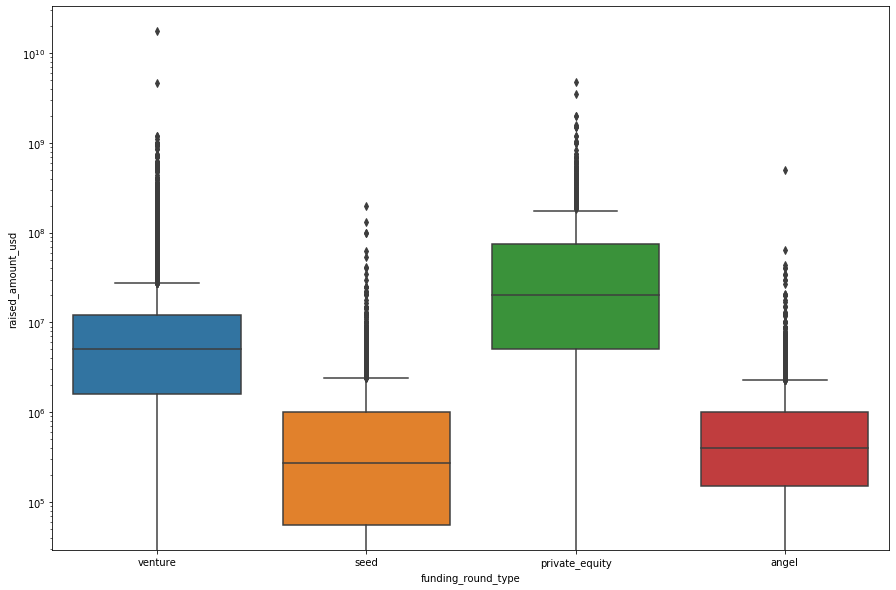

In [301]:
#A plot showing the fraction of total investments (globally) in angel, venture, seed, and private equity, 
#and the average amount of investment in each funding type. This chart should make it clear that a certain funding type (FT) 
#is best suited for Spark Funds.

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 10))
sns.boxplot(x='funding_round_type', y='raised_amount_usd', data=df_4)
plt.yscale('log')
plt.show()

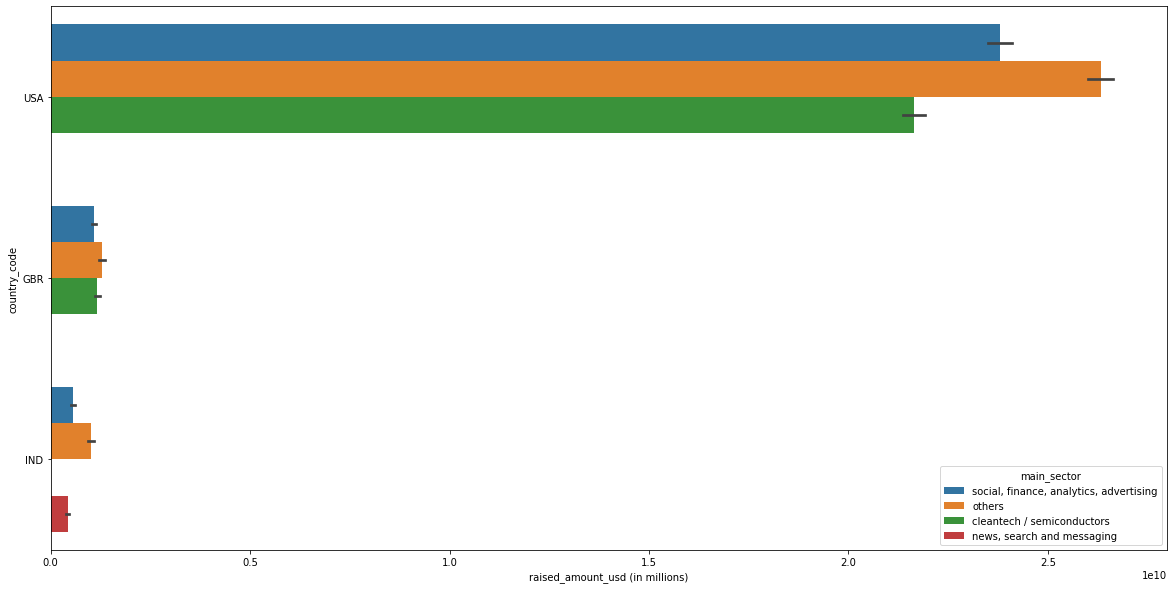

In [302]:
D1=D1[D1['main_sector'].isin(['others','social, finance, analytics, advertising','cleantech / semiconductors'])]
D2=D2[D2['main_sector'].isin(['others','social, finance, analytics, advertising','cleantech / semiconductors'])]
D3=D3[D3['main_sector'].isin(['others','social, finance, analytics, advertising','news, search and messaging'])]


#A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart
#(for the chosen investment type FT). 


frames = [D1, D2, D3]
result = pd.concat(frames)
plt.figure(figsize=(20, 10))
sns.barplot(y='country_code', x='raised_amount_usd', hue="main_sector", data=result, estimator=np.sum)
plt.xlabel("raised_amount_usd (in millions)")

plt.show()


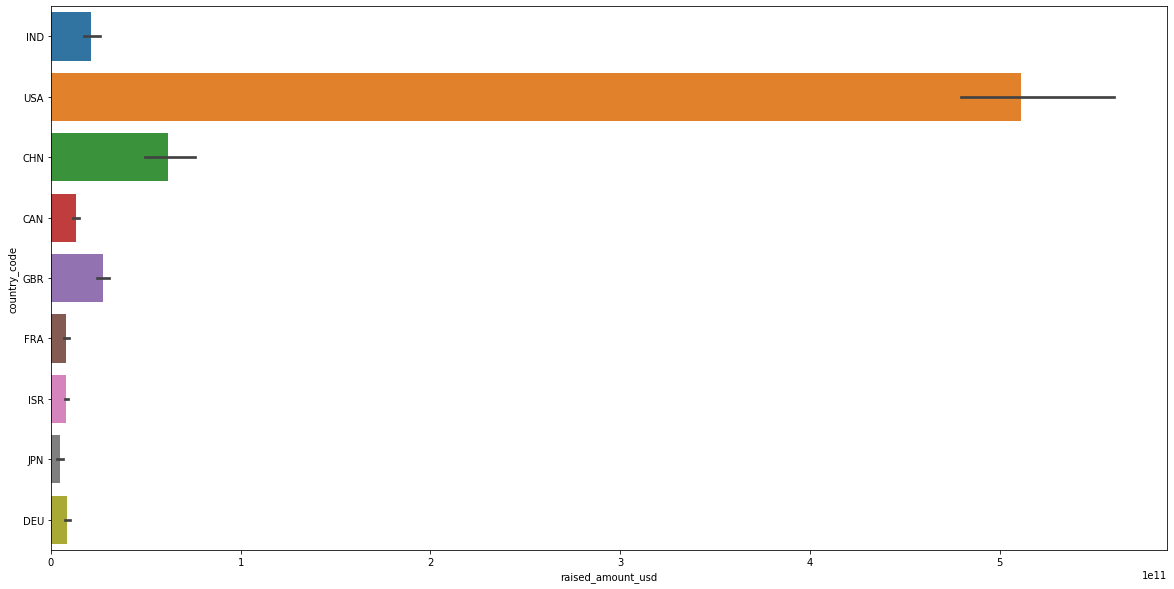

In [303]:
#A plot showing the top 9 countries against the total amount of investments of funding type FT.
#This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.

frames = [top9]
result = pd.concat(frames)
plt.figure(figsize=(20, 10))
sns.barplot(y='country_code', x='raised_amount_usd', data=result, estimator=np.sum)
plt.show()